In [2]:
import numpy as np
import cv2
import sys

In [5]:
img = cv2.imread('./fig/lenna.bmp')

h, w = img.shape[:2]

img_linear = cv2.resize(img, (int(2*w), int(2*h)), interpolation = cv2.INTER_LINEAR)
img_nearest = cv2.resize(img, (int(2*w), int(2*h)), interpolation = cv2.INTER_NEAREST)
# img_half = cv2.resize(img, (w//2, h//2), interpolation = cv2.INTER_AREA)


if img is None:
    print('failed')
    sys.exit
    
    
# cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
cv2.imshow('image', img)
# cv2.imshow('iamge_half', img_half)
cv2.imshow('image_linear', img_linear)
cv2.imshow('image_nearest', img_nearest)

while True:
    key = cv2.waitKey()
    if key == 27:
        break
        
    elif key == ord('i'):
        img = 255 - img
    
    elif key == ord('e'):
        edge = cv2.Canny(img, 50, 150)
        
        
cv2.destroyAllWindows()

In [7]:
imgBGR = cv2.imread('./fig/lenna.bmp')

# imgHSV = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HSV)
imgHSV = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2YCrCb)
h, s, v = cv2.split(imgHSV)


cv2.imshow('imgBGR', imgBGR)
cv2.imshow('imgHSV', imgHSV)

cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
import glob

img_list = glob.glob('../Ch_1_Opencv_Intro/fig/images/*.jpg')

cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('image', cv2.WND_PROP_FULLSCREEN,
                     cv2.WINDOW_FULLSCREEN)

idx = 0

while True:
    img = cv2.imread(img_list[idx])
    cv2.imshow('image', img)
    
    if cv2.waitKey() == 27:
        break
        
    idx += 1
    
    if idx >= len(img_list):
        idx = 0

cv2.destroyAllWindows()

In [10]:
img1 = np.zeros((400, 600, 3), np.uint8)
img2 = np.ones((400, 600, 3), np.uint8)*255
img3 = np.full((400, 600, 3), (255, 0, 255), np.uint8)

In [11]:
src = cv2.imread('../Ch_2_Opencv_basic/fig/airplane.bmp')
mask = cv2.imread('../Ch_2_Opencv_basic/fig/mask_plane.bmp')
dst = cv2.imread('../Ch_2_Opencv_basic/fig/field.bmp')

cv2.copyTo(src, mask, dst)

cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
cap = cv2.VideoCapture(0)

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

fourcc = cv2. cv2.VideoWriter_fourcc(*'DIVX')

out = cv2.VideoWriter('review.avi', fourcc, fps, (w, h))

if not cap.isOpened():
    print('failed')
    sys.exit()
    
while True:
    ret, frame = cap.read()
    
    if not ret:
        print('video failed')
        break
        
    cv2.imshow('image', frame)
    
    out.write(frame)
    if cv2.waitKey(20) == 27:
        break
        
cap.release()    
out.release()  
cv2.destroyAllWindows()

mouse event

In [16]:
oldx = oldy = 0

def call_mouse(event, x, y, flags, params):
    global oldx, oldy

#     if event == cv2.EVENT_LBUTTONUP:
#         oldx, oldy = x, y
#         print('left btn up = ', x, y)
        
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        print('left btn down = ', x, y)
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags == cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y),
                     (255, 0, 0), 5, cv2.LINE_AA)
            cv2.imshow('image', img)
            oldx, oldy = x, y


img = np.ones((480, 640, 3), dtype = np.uint8)*255


cv2.namedWindow('image')
cv2.setMouseCallback('image', call_mouse, img)


cv2.imshow('image', img)

while True:
    key = cv2.waitKey()
    if key == 27:
        break
        
    elif key == ord('s'):
        cv2.imwrite('sign.png', img)
        
        
cv2.destroyAllWindows()

left btn down =  240 228
left btn down =  425 329
left btn down =  455 233
left btn down =  508 355


trackbar

In [17]:
def call_trackbar(pos):
    img[:] = pos
    cv2.imshow('image', img)


img = np.zeros((480, 640), np.uint8)

cv2.namedWindow('image')
cv2.createTrackbar('level', 'image', 50, 255, call_trackbar)

cv2.imshow('image', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
def call_trackbar(pos):
    global mask
    img_glass = mask*pos
    cv2.imshow('image', img_glass)


img_alpha = cv2.imread('../Ch_2_Opencv_basic/fig/imgbin_sunglasses_1.png', cv2.IMREAD_UNCHANGED)
mask = img_alpha[:,:, -1]
mask[mask > 0] = 1

cv2.namedWindow('image')
cv2.createTrackbar('level', 'image', 0, 255, call_trackbar)

cv2.imshow('image', mask)
cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
import matplotlib.pyplot as plt

In [23]:
src = cv2.imread('./fig/lenna.bmp', 0)

dst = cv2.add(src, 100)
dst_np = np.clip(src + 100.0, 0, 255).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst_np', dst_np)

cv2.waitKey()
cv2.destroyAllWindows()

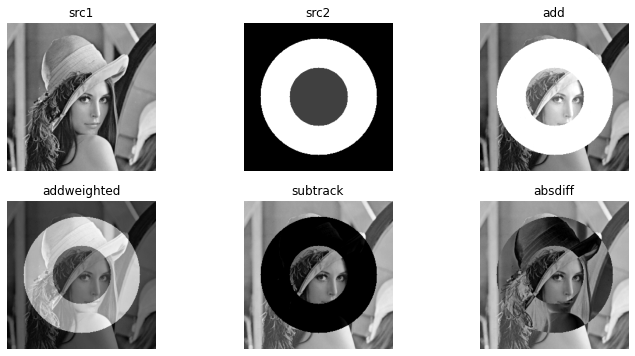

In [24]:
src1 = cv2.imread('./fig/lenna256.bmp', cv2.IMREAD_GRAYSCALE)
src2 = np.zeros((256,256), dtype = np.uint8)

cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)


plt.figure(figsize=(12, 6))
plt.subplot(231), plt.imshow(src1, cmap = 'gray'), plt.axis('off'), plt.title('src1')
plt.subplot(232), plt.imshow(src2, cmap = 'gray'), plt.axis('off'), plt.title('src2')
plt.subplot(233), plt.imshow(dst1, cmap = 'gray'), plt.axis('off'), plt.title('add')
plt.subplot(234), plt.imshow(dst2, cmap = 'gray'), plt.axis('off'), plt.title('addweighted')
plt.subplot(235), plt.imshow(dst3, cmap = 'gray'), plt.axis('off'), plt.title('subtrack')
plt.subplot(236), plt.imshow(dst4, cmap = 'gray'), plt.axis('off'), plt.title('absdiff')
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()


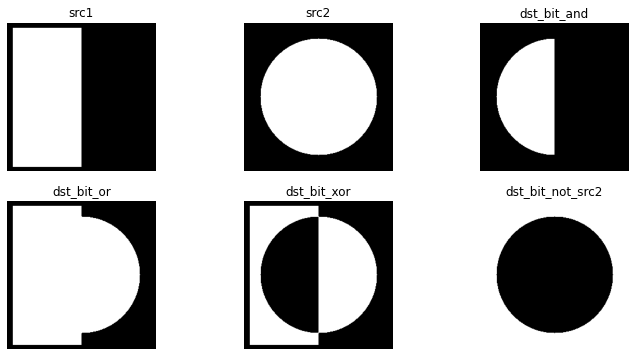

In [25]:
src1 = np.zeros((256,256), np.uint8)
# src1[10:246, 10:127] = 255
cv2.rectangle(src1, (10, 10), (127, 248), 255, -1)

src2 = np.zeros((256, 256), dtype = np.uint8)
cv2.circle(src2, (128, 128), 100, 255, -1)
# cv2.circle(src2, (128, 128), 50, 255, -1)

dst_bit_and = cv2.bitwise_and(src1, src2)
dst_bit_or = cv2.bitwise_or(src1, src2)
dst_bit_xor = cv2.bitwise_xor(src1, src2)
dst_bit_not= cv2.bitwise_not(src2)

plt.figure(figsize = (12, 6))
plt.subplot(231), plt.axis('off'), plt.imshow(src1, 'gray'), plt.title('src1')
plt.subplot(232), plt.axis('off'), plt.imshow(src2, 'gray'), plt.title('src2')
plt.subplot(233), plt.axis('off'), plt.imshow(dst_bit_and, 'gray'), plt.title('dst_bit_and')
plt.subplot(234), plt.axis('off'), plt.imshow(dst_bit_or, 'gray'), plt.title('dst_bit_or')
plt.subplot(235), plt.axis('off'), plt.imshow(dst_bit_xor, 'gray'), plt.title('dst_bit_xor')
plt.subplot(236), plt.axis('off'), plt.imshow(dst_bit_not, 'gray'), plt.title('dst_bit_not_src2')
plt.show()

color

In [30]:
src = cv2.imread('./fig/flowers.jpg', cv2.IMREAD_COLOR)

if src is None:
    print('failed')
    sys.exit()
    
print(src.shape)

    
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(src_hsv)

# b, g, r = cv2.split(src)
# dst = cv2.merge((b, g, r))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('h', h)
cv2.imshow('s', s)
cv2.imshow('v', v)

cv2.waitKey()
cv2.destroyAllWindows()

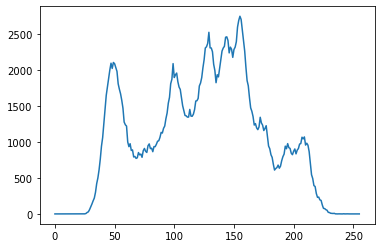

In [31]:
src = cv2.imread('./fig/lenna.bmp', cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([src], [0], None, [256], [0, 256])


cv2.imshow('src', src)
plt.plot(hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

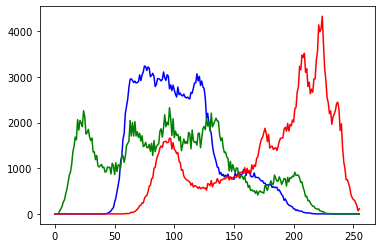

In [32]:
src = cv2.imread('./fig/lenna.bmp', cv2.IMREAD_COLOR)

b = cv2.calcHist([src], [0], None, [256], [0, 256])
g = cv2.calcHist([src], [1], None, [256], [0, 256])
r = cv2.calcHist([src], [2], None, [256], [0, 256])


cv2.imshow('src', src)
plt.plot(b, color = 'b')
plt.plot(g, color = 'g')
plt.plot(r, color = 'r')
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()